In [1]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [2]:
# Etterspørsel i likning (1)

def x_d(p):
    return 500 - 3.2*p

#Tilbud i likning (3)

def x_s(p,t):
    return -100+4.3*p*(1-t)

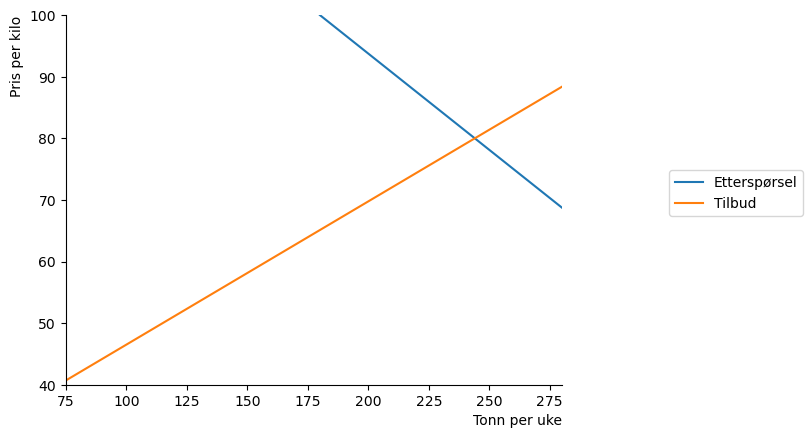

In [3]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.legend(bbox_to_anchor=(1.5,0.6));

In [16]:
#Tegn inn tilbudsfunksjon med 25% mva, og forklar hvorfor denne har brattere helning enn tilbudsfunksjon uten mva (t=0).
def x_s_mva(p,t):
    return -100+4.3*p*(1-0.25)

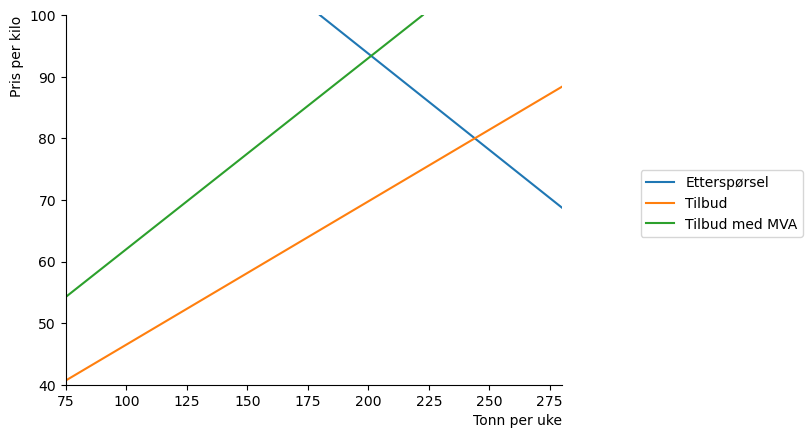

In [17]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.plot(x_s_mva(p_num, 0), p_num, label = 'Tilbud med MVA')

ax.legend(bbox_to_anchor=(1.5,0.6));

#Hvorfor er denne brattere enn den forrige?
#På grunn av den prosentvise endringen, det er ikke en konstant endring

In [27]:
#Beregn likevektspris og -kvantum med og uten mva, og vis disse i figuren.

# definer symboler i sympy

x,p,t,T=sp.symbols('x p t T', positive=True, real=True)

# betingelse for likevekt

eq_cond=sp.Eq(x_d(p),x_s(p,0))
eq_cond

Eq(500 - 3.2*p, 4.3*p - 100)

In [28]:
# løs for p
p_eq=sp.solve(eq_cond,p)
p_eq[0]

80.0000000000000

In [31]:
# finn tilsvarende kvantum
x_eq=x_s(p_eq[0],0)
x_eq

244.000000000000

In [32]:
#MED MVA

# definer symboler i sympy

x,p,t,T=sp.symbols('x p t T', positive=True, real=True)

# betingelse for likevekt

eq_cond=sp.Eq(x_d(p),x_s(p,0.25))
eq_cond

Eq(500 - 3.2*p, 3.225*p - 100)

In [33]:
# løs for p
p_eq=sp.solve(eq_cond,p)
p_eq[0]

93.3852140077821

In [35]:
# finn tilsvarende kvantum
x_eq=x_s(p_eq[0],0.25)
x_eq

201.167315175097

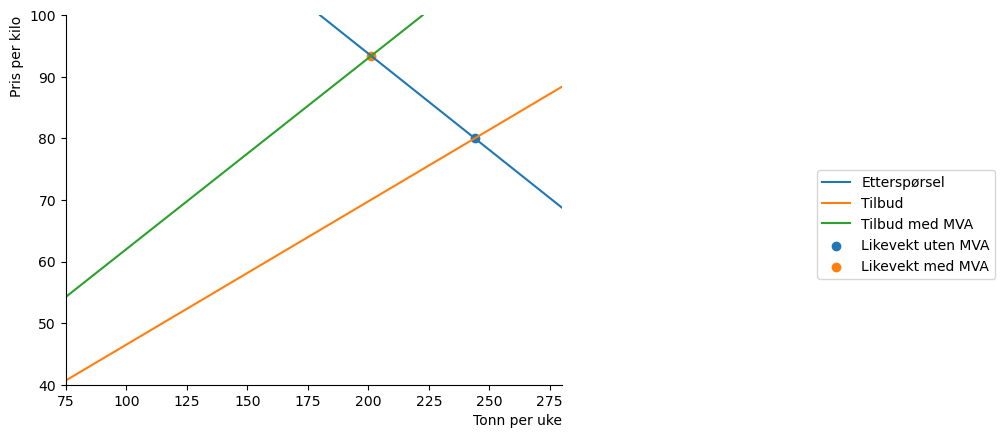

In [40]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.plot(x_s_mva(p_num, 0), p_num, label = 'Tilbud med MVA')

ax.scatter(244,80, label = 'Likevekt uten MVA')

ax.scatter(201,93.38, label = 'Likevekt med MVA')

ax.legend(bbox_to_anchor=(1.5,0.6));

In [43]:
# Bruk sp.lambdify for å gjøre om sympy til numpy array

# Likevektspris som funksjon av t og T

p_eq_fn=sp.lambdify(
    (t,T), 
    p_eq[0]
)

p_eq_fn(t,T)

93.3852140077821

In [44]:
# Likevektskvantum som funksjon av t og T

x_eq_fn=sp.lambdify(
    (t,T), 
    x_eq
)

x_eq_fn(t,T)

201.167315175097

In [45]:
# Kvantum omsatt med avgift på selger på t=0.25
x_eq_fn(0.25,0)

201.167315175097

In [46]:
# Kvantum omsatt med avgift på kjøper på T=0.25
x_eq_fn(0,0.25)

201.167315175097

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

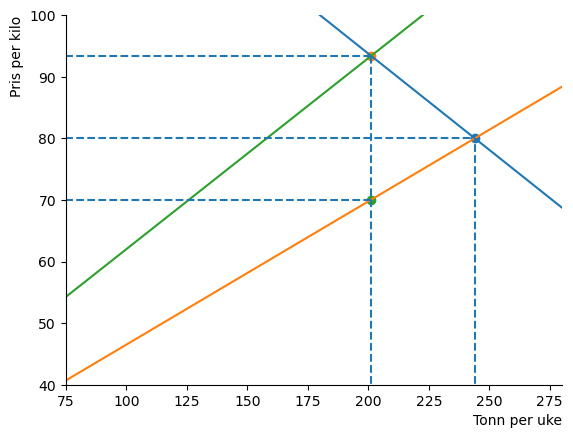

In [81]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.plot(x_s_mva(p_num, 0), p_num, label = 'Tilbud med MVA')

ax.scatter(244,80, label = 'Likevekt uten MVA')
ax.scatter(201,93.38, label = 'Likevekt med MVA')
ax.scatter(201, 70)

ax.hlines(93.38, 0, 201, linestyle = 'dashed')
ax.hlines(80, 0, 244, linestyle = 'dashed')
ax.hlines(70, 0, 201, linestyle = 'dashed')

ax.vlines(201, 0, 93.38, linestyle = 'dashed')
ax.vlines(244, 0, 80, linestyle = 'dashed')

ax.fill_between(x, 70, 80)

ax.legend(bbox_to_anchor=(1.5,0.6));

In [66]:
p_0 = p_eq_fn(0,0)
p_0

93.3852140077821

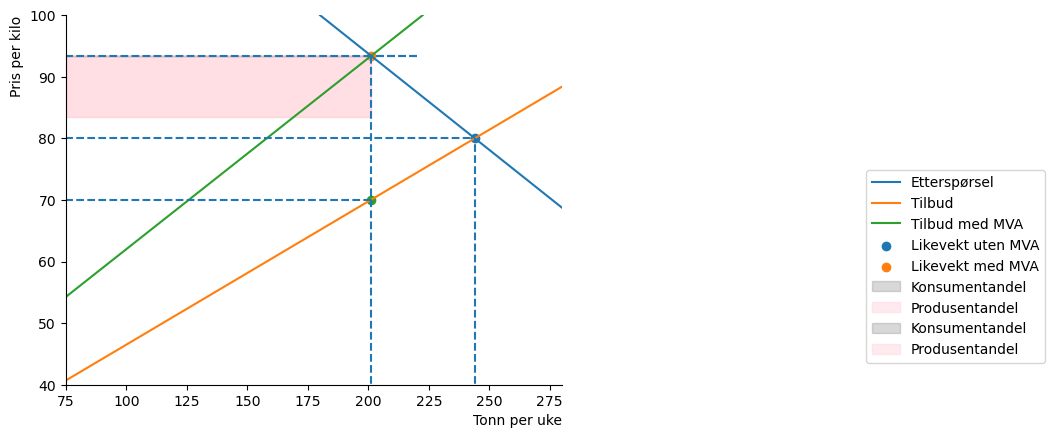

In [83]:
# vi kan illustrere hvem som betaler hva av avgiften

q=np.linspace (75,x_eq_fn(0,0), 250)


ax.hlines(p_eq_fn(0,0),220,x_eq_fn(0,0), linestyles='dashed')

ax.fill_between(q,p_0,p_kons, color = "gray",alpha = 0.3,label='Konsumentandel')
ax.fill_between(q,p_0,p_kons-10, color = "pink",alpha = 0.3,label='Produsentandel')

ax.legend(bbox_to_anchor=(1.6,0.6))
fig

In [ ]:
#Hva er fordeler/ulemper av en mva og en stykkprisavgift?
#Inntekt for staten, fordel for innlandshandel
#En ulempe er at det blir produsert mindre fordi etterspørselen er mindre når det er dyrere for like mye produksjon.
#Særavgifter går under stykkprisavgifter. Om denne avgiften blir gjort riktig kan det gi en fordel f. eks i form av at man 
#betaler for miljøskaden en påfører med for eksempel drivstoff, lyd eller slitasje.